In [1]:
# Import python's built-in regular expression library
import re
import ollama
from ollama import chat, ChatResponse, Options


In [2]:
import subprocess
import pandas as pd
import os
cpu_count = os.cpu_count()
print(cpu_count)
SYSTEM = "You are an interpreter trying to convert ASL phrases and fingerspelled names into English sentences. You must strictly follow the grammar provided"
# SYSTEM = "You are an interpreter trying to convert ASL signals (possibly misclassified and duplicated) and fingerspelled names into English sentences. You must strictly follow this grammar provided."

PROMPT = "Your Name Name What 2 1 2 2"
# PROMPT = "Hello Hello My h h Name h 9 K E I I T H"
# PROMPT = 'J my my H name name C H R I S'
# PROMPT = "hello your hello H what name name name 5 what what"
PROMPT= 'hello hello J my my my name name name K E I T H'
# PROMPT = "my name H name C H R I"
# PROMPT = "5 hello hello J your my H name name M I C H E L your L E"

def get_response(model, prompt):
    result = subprocess.run(["./llama-cli/llama-cli", 
                    "-m",
                    model,
                    "--jinja",
                    "--single-turn",
                    "-sys",
                    SYSTEM,
                    "-p",
                    prompt,
                    "--grammar-file",
                    "./grammar/english.gbnf",
                    "-t",
                    str(cpu_count)
                    ],
                    capture_output=True,
                    text=True)
    s = result.stdout
    return s

16


In [ ]:
import time

MODEL_CONFIGS = {
    "LLaMA3": {
        "model_path": "./model/ggml-model-Q4_K_M.gguf"
    },
    # "TinyLlama": {
    #     "model_path": "./model/tiny_llama-1.1b-v1.gguf"
    # },
}

def get_time(model, prompt):
    start = time.time()
    s=get_response(model, prompt)
    print(s)
    end = time.time()
    runtime = end - start
    return runtime

for model in MODEL_CONFIGS:
    print(f"Model: {model}")
    print(get_time(MODEL_CONFIGS[model]["model_path"], PROMPT))


Model: LLaMA3


In [ ]:
# Find the index of '[end of text]'
end_marker = "[end of text]"
end_index = s.find(end_marker)

if end_index != -1:
    # Get the substring before '[end of text]'
    before_end = s[:end_index]

    # Find the last newline before '[end of text]'
    last_newline_index = before_end.rfind('\n')

    # Extract the line just before '[end of text]'
    line_before_end = before_end[last_newline_index + 1:].strip()

    print(line_before_end)
else:
    print("[end of text] not found.")

hello what is your name?


In [8]:
import pandas as pd
MODEL_CONFIGS = {
    "LLaMA3": {
        "model_path": "./model/ggml-model-Q4_K_M.gguf"
    },
    "TinyLlama": {
        "model_path": "./model/tiny_llama-1.1b-v1.gguf"
    },
}
df = pd.read_csv('asl_llm_model_comparison_3runs_new.csv')
df2 = pd.read_csv('asl_llm_model_comparison_3runs_tiny.csv')
# Print summary
for model in MODEL_CONFIGS:
    if model == "LLaMA3":
        avg_precision = df[model + "_bertscore_precision"].mean()
        avg_recall = df[model + "_bertscore_recall"].mean()
        avg_f1 = df[model + "_bertscore_f1"].mean()
        std = df[model + "_bertscore_f1"].std()
        print(f"{model} - Avg BERTScore Precision: {avg_precision:.4f}")
        print(f"{model} - Avg BERTScore Recall: {avg_recall:.4f}")
        print(f"{model} - Avg BERTScore F1: {avg_f1:.4f}")
        print(f"{model} - Std Dev BERTScore F1: {std:.4f}")
    else:
        avg_precision = df2[model + "_bertscore_precision"].mean()
        avg_recall = df2[model + "_bertscore_recall"].mean()
        avg_f1 = df2[model + "_bertscore_f1"].mean()
        std = df2[model + "_bertscore_f1"].std()
        print(f"{model} - Avg BERTScore Precision: {avg_precision:.4f}")
        print(f"{model} - Avg BERTScore Recall: {avg_recall:.4f}")
        print(f"{model} - Avg BERTScore F1: {avg_f1:.4f}")
        print(f"{model} - Std Dev BERTScore F1: {std:.4f}")


LLaMA3 - Avg BERTScore Precision: 0.8926
LLaMA3 - Avg BERTScore Recall: 0.9113
LLaMA3 - Avg BERTScore F1: 0.9018
LLaMA3 - Std Dev BERTScore F1: 0.0491
TinyLlama - Avg BERTScore Precision: 0.8694
TinyLlama - Avg BERTScore Recall: 0.8695
TinyLlama - Avg BERTScore F1: 0.8693
TinyLlama - Std Dev BERTScore F1: 0.0485


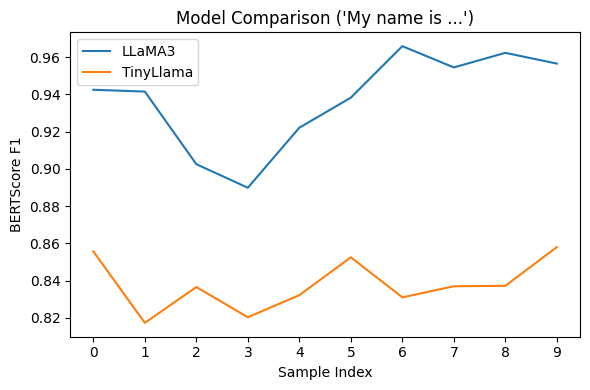

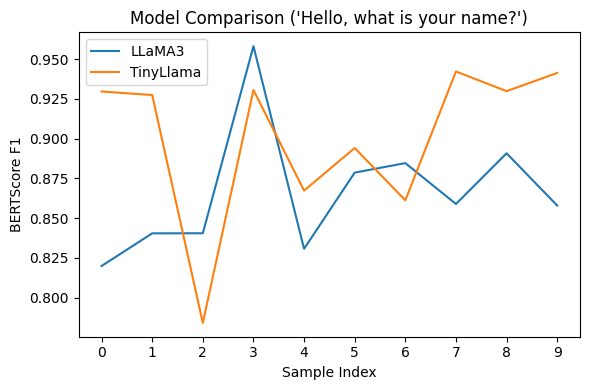

In [9]:
import matplotlib.pyplot as plt


# plt.plot(df["LLaMA3_bertscore_f1"], label="Llama3")
# plt.plot(df2["TinyLlama_bertscore_f1"], label="TinyLlama")
# plt.xlabel("Sample Index")
# plt.ylabel("BERTScore F1")
# plt.xticks(range(len(df)))  
# plt.legend()
# plt.title("Model Comparison per Sample")
# plt.show()

# Plot for samples 0–9
plt.figure(figsize=(6, 4))
plt.plot(df["LLaMA3_bertscore_f1"][:10], label="LLaMA3")
plt.plot(df2["TinyLlama_bertscore_f1"][:10], label="TinyLlama")
plt.xlabel("Sample Index")
plt.ylabel("BERTScore F1")
plt.title("Model Comparison ('My name is ...')")
plt.xticks(range(10))
plt.legend()
plt.tight_layout()
plt.show()

# Plot for samples 10–19
plt.figure(figsize=(6, 4))
plt.plot(df["LLaMA3_bertscore_f1"][10:20].reset_index(drop=True), label="LLaMA3")
plt.plot(df2["TinyLlama_bertscore_f1"][10:20].reset_index(drop=True), label="TinyLlama")
plt.xlabel("Sample Index")
plt.ylabel("BERTScore F1")
plt.title("Model Comparison ('Hello, what is your name?')")
plt.xticks(range(10))
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
import re

# Function to normalize text (lowercase, remove punctuation, trim spaces)
def normalize(text):
    return re.sub(r'[^a-z0-9 ]', '', text.lower().strip())

# Updated accuracy function with normalization
def compute_normalized_accuracy(df, model_name):
    correct = 0
    total = len(df)
    for i, row in df.iterrows():
        norm_gt = normalize(row['ground_truth'])
        outputs = [normalize(row[f"{model_name}_output_{j}"]) for j in range(1, 4)]
        if norm_gt in outputs:
            correct += 1
    return correct / total * 100

# Compute normalized accuracy
normalized_accuracy_llama3 = compute_normalized_accuracy(df, "LLaMA3")
normalized_accuracy_gemma = compute_normalized_accuracy(df, "TinyLlama")

normalized_accuracy_llama3, normalized_accuracy_gemma


(40.0, 30.0)